In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('SolarDataProcessed.csv',index_col=0)
print(df.head())

   PRECTOT      QV2M     PS     TS    KT  ALLSKY_SFC_LW_DWN  ALLSKY_SFC_SW_DWN
0      0.0  0.003886  99.11  11.85  0.68               3.97               6.50
1      0.0  0.003804  99.05  11.48  0.68               3.97               6.50
2      0.0  0.003462  99.13  11.86  0.76               4.42               6.36
3      0.0  0.003457  99.06  12.04  0.76               4.42               6.36
4      0.0  0.002913  99.31  10.09  0.73               4.29               6.50


In [25]:
df.head()

,PRECTOT,QV2M,PS,TS,KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN
0,0.0,0.003886,99.11,11.85,0.68,3.97,6.50
1,0.0,0.003804,99.05,11.48,0.68,3.97,6.50
2,0.0,0.003462,99.13,11.86,0.76,4.42,6.36
3,0.0,0.003457,99.06,12.04,0.76,4.42,6.36
4,0.0,0.002913,99.31,10.09,0.73,4.29,6.50


In [2]:
df = df.rename(columns={"PRECTOT": "Precipitation", "QV2M": "Specific humidity", "PS": "Surface Pressure", 
                   "TS": "Surface Temperature", "KT": "Clearness Index", "ALLSKY_SFC_LW_DWN": "Radiative Flux",
                  "ALLSKY_SFC_SW_DWN": "Radiation"})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24592 entries, 0 to 24591
Data columns (total 7 columns):
Precipitation          24592 non-null float64
Specific humidity      24592 non-null float64
Surface Pressure       24592 non-null float64
Surface Temperature    24592 non-null float64
Clearness Index        24592 non-null float64
Radiative Flux         24592 non-null float64
Radiation              24592 non-null float64
dtypes: float64(7)
memory usage: 1.5 MB


In [28]:
df.head()

,Precipitation,Specific humidity,Surface Pressure,Surface Temperature,Clearness Index,Radiative Flux,Radiation
0,0.0,0.003886,99.11,11.85,0.68,3.97,6.50
1,0.0,0.003804,99.05,11.48,0.68,3.97,6.50
2,0.0,0.003462,99.13,11.86,0.76,4.42,6.36
3,0.0,0.003457,99.06,12.04,0.76,4.42,6.36
4,0.0,0.002913,99.31,10.09,0.73,4.29,6.50


In [4]:
df['KT'] = df['KT'].astype(float)

KeyError: 'KT'

In [5]:
df[df == -999] = np.nan
(df<0).any()

Precipitation          False
Specific humidity      False
Surface Pressure       False
Surface Temperature    False
Clearness Index        False
Radiative Flux         False
Radiation              False
dtype: bool

In [11]:
df.corr()

,PRECTOT,QV2M,PS,TS,KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN
PRECTOT,1.000000,0.451316,-0.266209,0.112126,-0.458312,-0.232486,0.324511
QV2M,0.451316,1.000000,-0.679591,0.501087,-0.516028,0.015321,0.786639
PS,-0.266209,-0.679591,1.000000,-0.888651,0.337548,-0.443796,-0.873155
TS,0.112126,0.501087,-0.888651,1.000000,-0.204434,0.591189,0.842778
KT,-0.458312,-0.516028,0.337548,-0.204434,1.000000,0.603887,-0.505506
ALLSKY_SFC_LW_DWN,-0.232486,0.015321,-0.443796,0.591189,0.603887,1.000000,0.272502
ALLSKY_SFC_SW_DWN,0.324511,0.786639,-0.873155,0.842778,-0.505506,0.272502,1.000000


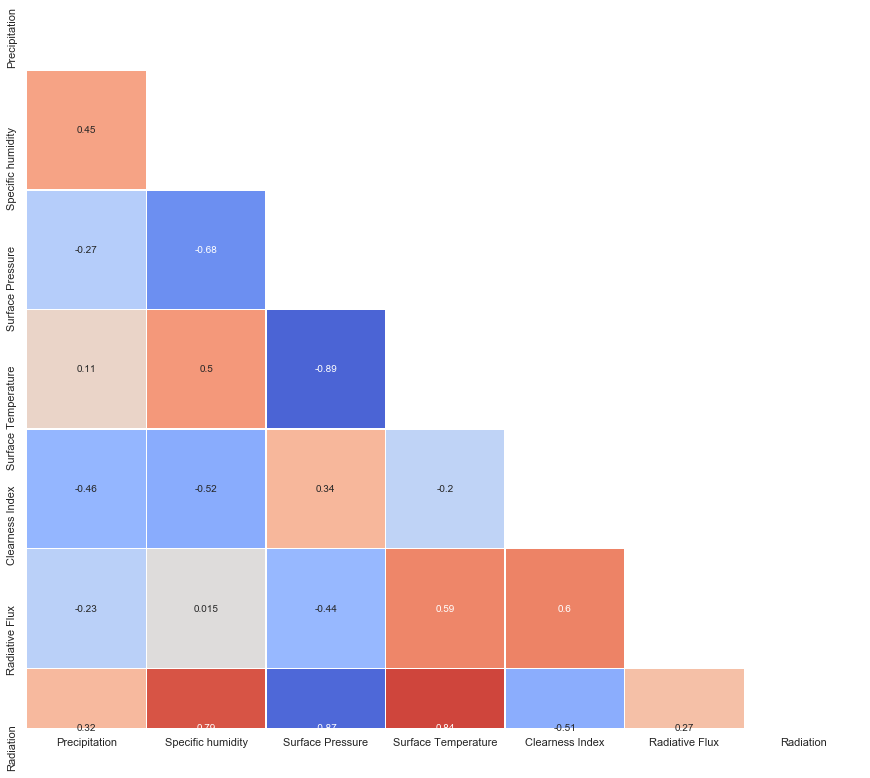

In [8]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#df['WeekOfYear'] = df.index.date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(df)

In [7]:
import re
df.replace(r'^\s*$', np.nan, regex=True)

In [8]:
df.fillna(df.mean(), inplace=True)

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x = df[df.columns[:6]]
y = df['Radiation']
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  90)
#Select numerical columns which needs to be normalized
train_norm = x_train[x_train.columns[0:6]]
test_norm = x_test[x_test.columns[0:16]]
# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())
# Normalize Testing Data by using mean and SD of training set
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

       Precipitation  Specific humidity  Surface Pressure  \
9450       -0.319555          -0.895394          1.140664   
24404      -0.319555          -0.579861         -1.151702   
12404      -0.217766          -0.703417          1.098213   
13937      -0.314380          -0.525224          0.956709   
16087      -0.045242          -0.432391          0.970859   

       Surface Temperature  Clearness Index  Radiative Flux  
9450             -1.325103         0.956782       -0.720478  
24404             1.653781         0.253362        1.275017  
12404            -1.233339         0.253362       -1.113956  
13937            -1.309044         0.878624       -0.334027  
16087            -0.914460        -0.528214       -1.472302  
       Precipitation  Specific humidity  Surface Pressure  \
9450       -0.319555          -0.895394          1.140664   
24404      -0.319555          -0.579861         -1.151702   
12404      -0.217766          -0.703417          1.098213   
13937      -0.314

c:\python37\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
c:\python37\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


Train on 15738 samples, validate on 3935 samples
Epoch 1/100
15738/15738 [==============================] - 0s 25us/step - loss: 94.4871 - mean_squared_error: 94.4871 - mean_absolute_error: 9.2710 - mean_absolute_percentage_error: 105.4322 - acc: 0.0000e+00 - r2_score: -44.7440 - val_loss: 37.5553 - val_mean_squared_error: 37.5553 - val_mean_absolute_error: 5.5979 - val_mean_absolute_percentage_error: 62.2555 - val_acc: 0.0000e+00 - val_r2_score: -17.8035
Epoch 2/100
15738/15738 [==============================] - 0s 7us/step - loss: 16.8694 - mean_squared_error: 16.8694 - mean_absolute_error: 3.3197 - mean_absolute_percentage_error: 36.3476 - acc: 6.3540e-04 - r2_score: -7.1948 - val_loss: 6.9405 - val_mean_squared_error: 6.9405 - val_mean_absolute_error: 2.1332 - val_mean_absolute_percentage_error: 24.2440 - val_acc: 0.0015 - val_r2_score: -2.4722
Epoch 3/100
15738/15738 [==============================] - 0s 6us/step - loss: 6.8496 - mean_squared_error: 6.8496 - mean_absolute_error: 2

Epoch 22/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.9519 - mean_squared_error: 0.9519 - mean_absolute_error: 0.7847 - mean_absolute_percentage_error: 8.8400 - acc: 0.0037 - r2_score: 0.5389 - val_loss: 0.9221 - val_mean_squared_error: 0.9221 - val_mean_absolute_error: 0.7701 - val_mean_absolute_percentage_error: 8.6305 - val_acc: 0.0053 - val_r2_score: 0.5387
Epoch 23/100
15738/15738 [==============================] - 0s 7us/step - loss: 0.8987 - mean_squared_error: 0.8987 - mean_absolute_error: 0.7601 - mean_absolute_percentage_error: 8.5469 - acc: 0.0038 - r2_score: 0.5651 - val_loss: 0.8726 - val_mean_squared_error: 0.8726 - val_mean_absolute_error: 0.7476 - val_mean_absolute_percentage_error: 8.3666 - val_acc: 0.0051 - val_r2_score: 0.5634
Epoch 24/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.8517 - mean_squared_error: 0.8517 - mean_absolute_error: 0.7387 - mean_absolute_percentage_error: 8.2978 - acc: 0.0041 - r2_score: 0.5

Epoch 43/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.5058 - mean_squared_error: 0.5058 - mean_absolute_error: 0.5643 - mean_absolute_percentage_error: 6.3243 - acc: 0.0047 - r2_score: 0.7554 - val_loss: 0.4985 - val_mean_squared_error: 0.4985 - val_mean_absolute_error: 0.5626 - val_mean_absolute_percentage_error: 6.2973 - val_acc: 0.0061 - val_r2_score: 0.7507
Epoch 44/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.5001 - mean_squared_error: 0.5001 - mean_absolute_error: 0.5616 - mean_absolute_percentage_error: 6.2959 - acc: 0.0048 - r2_score: 0.7582 - val_loss: 0.4928 - val_mean_squared_error: 0.4928 - val_mean_absolute_error: 0.5592 - val_mean_absolute_percentage_error: 6.2601 - val_acc: 0.0064 - val_r2_score: 0.7536
Epoch 45/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.4947 - mean_squared_error: 0.4947 - mean_absolute_error: 0.5591 - mean_absolute_percentage_error: 6.2730 - acc: 0.0049 - r2_score: 0.7

Epoch 64/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.4216 - mean_squared_error: 0.4216 - mean_absolute_error: 0.5226 - mean_absolute_percentage_error: 5.9403 - acc: 0.0058 - r2_score: 0.7961 - val_loss: 0.4072 - val_mean_squared_error: 0.4072 - val_mean_absolute_error: 0.5158 - val_mean_absolute_percentage_error: 5.8554 - val_acc: 0.0066 - val_r2_score: 0.7964
Epoch 65/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.4199 - mean_squared_error: 0.4199 - mean_absolute_error: 0.5205 - mean_absolute_percentage_error: 5.9074 - acc: 0.0058 - r2_score: 0.7969 - val_loss: 0.4057 - val_mean_squared_error: 0.4057 - val_mean_absolute_error: 0.5144 - val_mean_absolute_percentage_error: 5.8337 - val_acc: 0.0066 - val_r2_score: 0.7972
Epoch 66/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.4183 - mean_squared_error: 0.4183 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 5.9160 - acc: 0.0059 - r2_score: 0.7

Epoch 85/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.4003 - mean_squared_error: 0.4003 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 5.7400 - acc: 0.0059 - r2_score: 0.8063 - val_loss: 0.3862 - val_mean_squared_error: 0.3862 - val_mean_absolute_error: 0.4998 - val_mean_absolute_percentage_error: 5.6757 - val_acc: 0.0061 - val_r2_score: 0.8069
Epoch 86/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.3996 - mean_squared_error: 0.3996 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 5.7313 - acc: 0.0058 - r2_score: 0.8070 - val_loss: 0.3853 - val_mean_squared_error: 0.3853 - val_mean_absolute_error: 0.4998 - val_mean_absolute_percentage_error: 5.6827 - val_acc: 0.0061 - val_r2_score: 0.8073
Epoch 87/100
15738/15738 [==============================] - 0s 5us/step - loss: 0.3990 - mean_squared_error: 0.3990 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 5.7294 - acc: 0.0059 - r2_score: 0.8

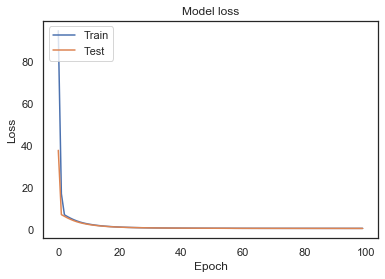

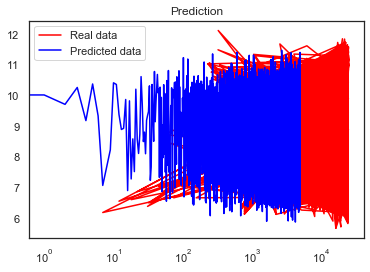

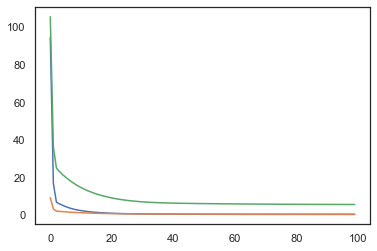

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.optimizers import SGD
from keras import optimizers
from matplotlib import pyplot as plt
from keras import backend as K
#Select predictors
x = df[df.columns[0:6]]
#Target variable 
y = df['Radiation']
#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8, random_state =  0)


model = keras.Sequential([
 keras.layers.Dense(5,input_dim=6,activation='relu'),
 keras.layers.Dense(5,activation='relu'),  
 keras.layers.Dense(1,activation='softplus')
 ])

def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='mean_squared_error',
              metrics=['mse', 'mae', 'mape','accuracy', r2_score])
history = model.fit(x_train, y_train, batch_size = 500, validation_split = 0.20, epochs = 100)
y_pred = model.predict(x_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.semilogx(y_test, color = 'red', label = 'Real data')
plt.semilogx(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.show()

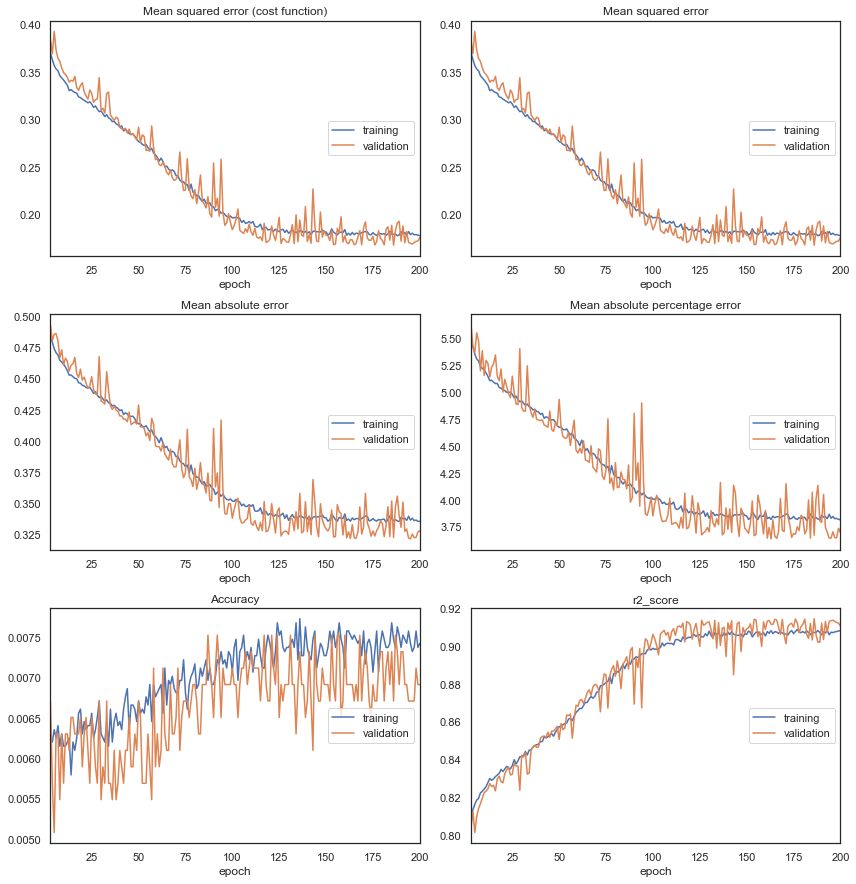

Mean squared error (cost function):
training   (min:    0.178, max:    0.388, cur:    0.178)
validation (min:    0.168, max:    0.423, cur:    0.176)

Mean squared error:
training   (min:    0.178, max:    0.388, cur:    0.178)
validation (min:    0.168, max:    0.423, cur:    0.176)

Mean absolute error:
training   (min:    0.335, max:    0.496, cur:    0.336)
validation (min:    0.322, max:    0.525, cur:    0.328)

Mean absolute percentage error:
training   (min:    3.807, max:    5.629, cur:    3.816)
validation (min:    3.638, max:    6.079, cur:    3.696)

Accuracy:
training   (min:    0.006, max:    0.008, cur:    0.007)
validation (min:    0.005, max:    0.008, cur:    0.007)

r2_score:
training   (min:    0.802, max:    0.909, cur:    0.908)
validation (min:    0.784, max:    0.915, cur:    0.911)


In [15]:
from livelossplot import PlotLossesKeras
 
model.fit(x_train, y_train,
          epochs=200,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)